# Machine Learning Notebook About Diabetes

## 1: Preprocessing 

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read CSV file**

In [3]:
data = pd.read_csv(r'diabetes2.csv')

In [4]:
data.shape

(768, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Synderomes                500 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Synderomes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,500.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.0
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.0
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.0
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.0
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,0.0


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Synderomes'],
      dtype='object')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Synderomes
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,NaN


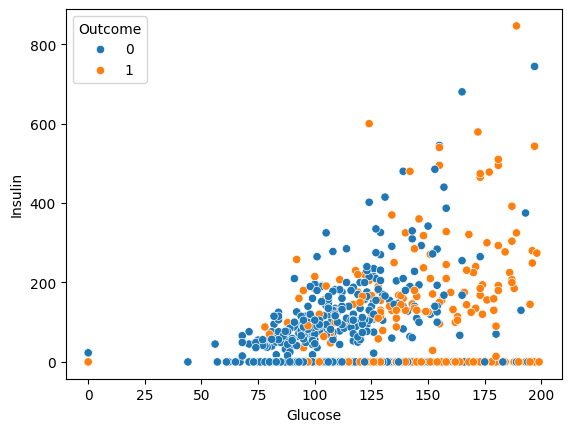

In [9]:
sns.scatterplot(x="Glucose",y="Insulin",hue='Outcome',data=data)
plt.show()

## 2: Data Cleaning

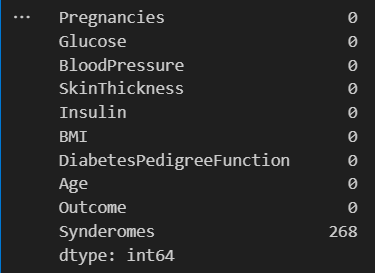

In [10]:
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Synderomes                  268
dtype: int64

<Axes: >

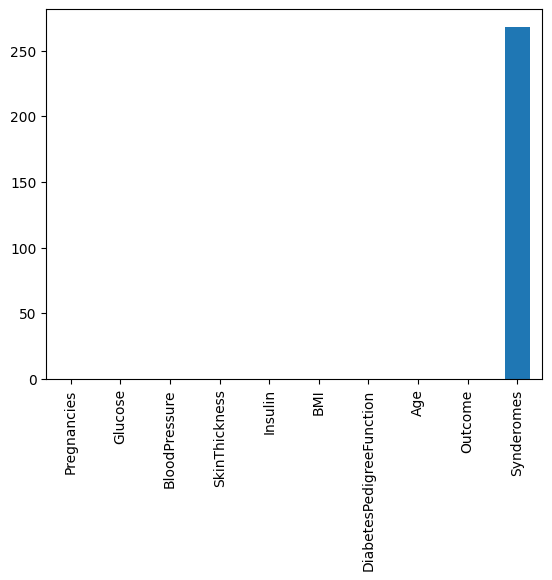

In [11]:
data.isnull().sum().plot(kind='bar')

In [12]:
# Syndromes column have null values more than 30%, so we have to drop the column
data=data.drop(["Synderomes"],axis=1) # ! inplace: removes the column permenantly...

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
print('The duplicated data', data.duplicated().sum()) # ! added
# ! No duplicated data found, so we need not to remove anything!

The duplicated data 0


In [16]:
data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [17]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [18]:
data['Outcome']= data['Outcome'].replace({"NO":0,"YES":1})

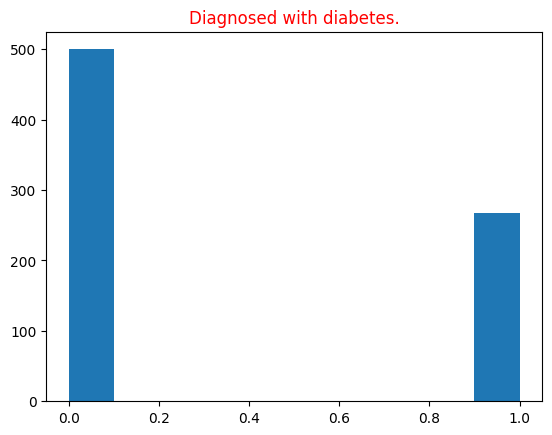

In [19]:
plt.hist(data['Outcome'], bins=10)
plt.title("Diagnosed with diabetes.", color='r')
plt.show()

In [20]:
# data['Outcome']=data['Outcome'].replace({0:"NO",1:"YES"})
# ! we need not to encode anything in this code, it is already have numerated values.
# ! we need not to replace any non values, because there are not any!

**Visualization**

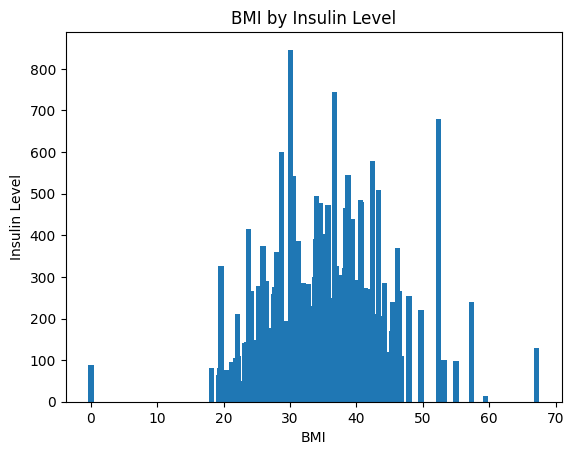

In [21]:
plt.bar(data['BMI'], data['Insulin'])
plt.xlabel('BMI')
plt.ylabel('Insulin Level')
plt.title('BMI by Insulin Level')
plt.show()

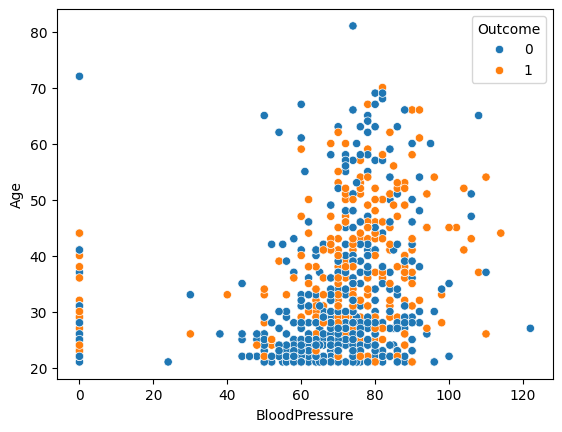

In [22]:
sns.scatterplot(x="BloodPressure",y= "Age",hue='Outcome',data= data)
plt.show()

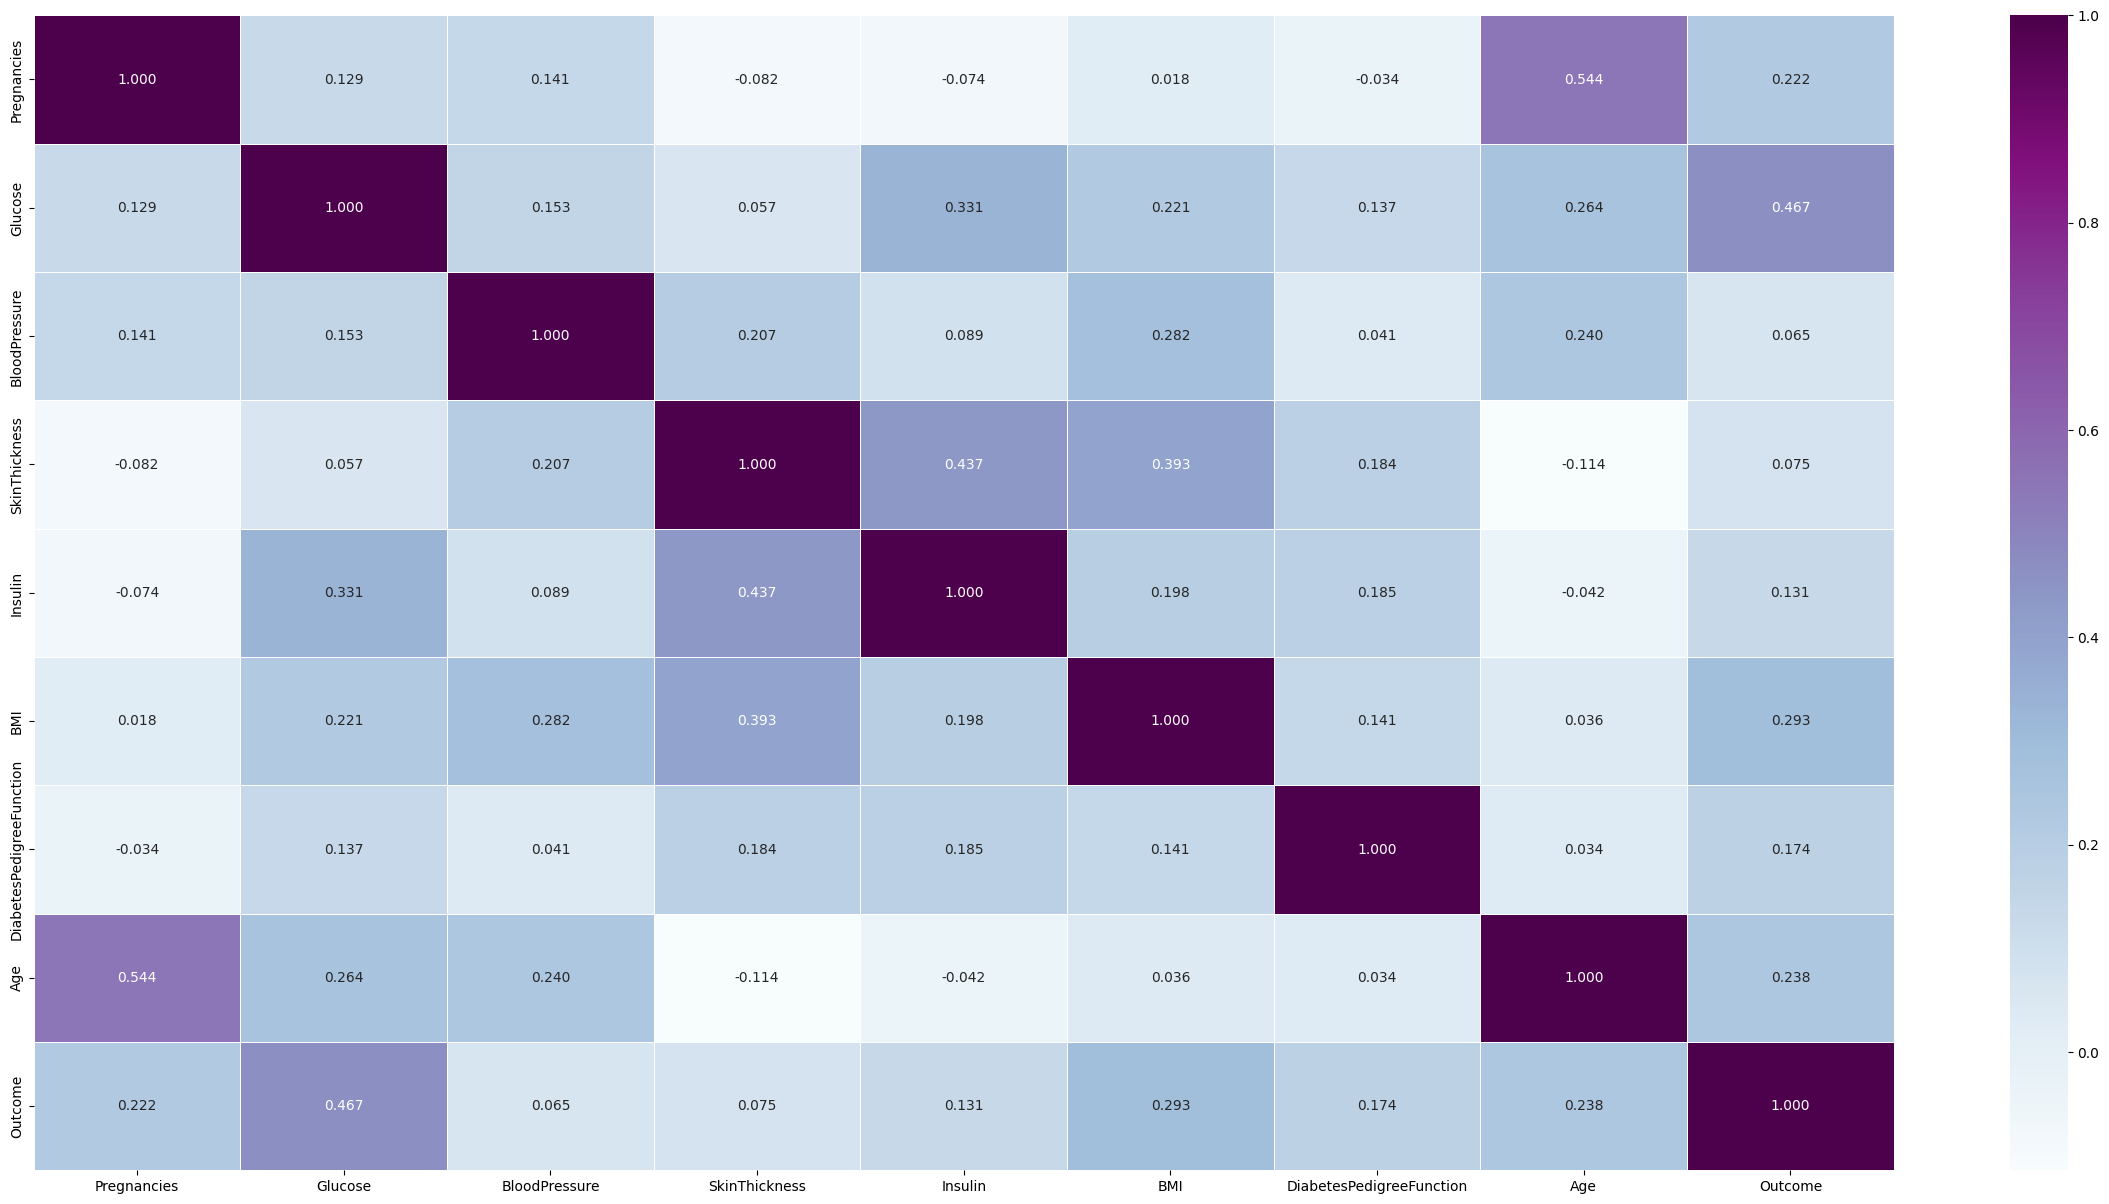

In [23]:
plt.figure(figsize=(30,15))
# ! we can perform one-hot encoding when we have object variables 
# data_encoded= pd.get_dummies(data)
sns.heatmap(data.corr(),annot =True,linewidth="0.5",fmt=".3f",cmap='BuPu')
plt.show()

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Spilting Data && Oversampling**

In [64]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# x= data.drop(columns=["Outcome"], axis= 1)
# y= data["Outcome"] # Target

In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # - To increase the size of the dataset by oversampling.
smote = SMOTE(random_state=42)
# x0, y0 = smote.fit_resample(x, y)
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_test_resampled, y_test_resampled = smote.fit_resample(x_test, y_test)

In [59]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [60]:
x_train_resampled.shape, y_train_resampled.shape

((800, 8), (800,))

In [61]:
x_test.shape , y_test.shape 

((154, 8), (154,))

In [62]:
x_test_resampled.shape, y_test_resampled.shape

((200, 8), (200,))

## Model Building && Machine Learning

### 1. KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(x_train_resampled,y_train_resampled)
print ( 'KNNModel Train Score is :', knnmodel.score(x_train_resampled , y_train_resampled) )
print ( 'KNNModel Test Score is :', knnmodel.score(x_test_resampled , y_test_resampled) )

KNNModel Train Score is : 0.80375
KNNModel Test Score is : 0.75


In [69]:
y_pred1 = knnmodel.predict (x_test_resampled)
print('actual Output : ' , (y_test_resampled[:10].tolist()))
print('predict Output : ' , (y_pred1[:10].tolist()))

actual Output :  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
predict Output :  [0, 0, 0, 0, 1, 0, 1, 0, 0, 1]


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test_resampled , y_pred1)
cm

array([[74, 26],
       [24, 76]], dtype=int64)

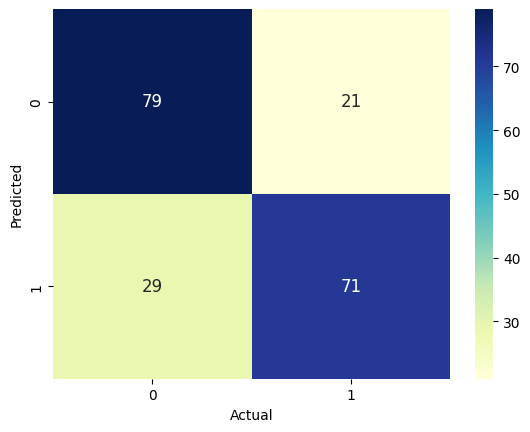

In [ ]:
import seaborn as sns 
sns.heatmap (cm , annot_kws= {"size" :12 },annot= True , fmt="g" , cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [71]:
print ( classification_report (y_test_resampled , y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.75      0.76      0.75       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(x_train_resampled , y_train_resampled)
print ('NBModel Train Score is : ' , NBModel.score(x_train_resampled,y_train_resampled))
print ('NBModel Test Score is : ' , NBModel.score(x_test_resampled,y_test_resampled))

NBModel Train Score is :  0.73625
NBModel Test Score is :  0.775


In [ ]:
y_pred2 = NBModel.predict(x_test_resampled)
print('actual Output : ' , (y_test_resampled[:10].tolist()))
print('predict Output : ' , (y_pred2[:10].tolist()))

actual Output :  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
predict Output :  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test_resampled , y_pred2)
cm

array([[82, 18],
       [27, 73]], dtype=int64)

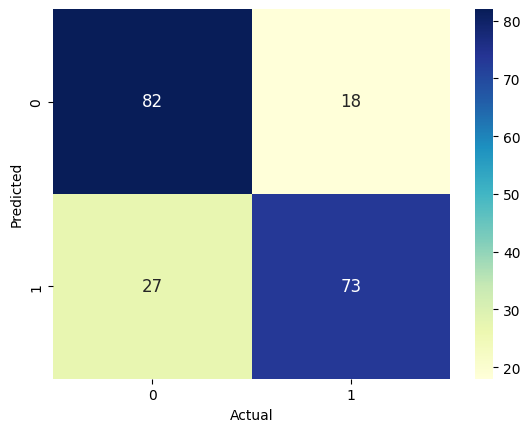

In [ ]:
import seaborn as sns 
sns.heatmap (cm , annot_kws= {"size" :12 },annot= True , fmt="g" , cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print ( classification_report (y_test_resampled , y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.80      0.73      0.76       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='gini') 
DTModel.fit(x_train_resampled,y_train_resampled)
print('DTModel Train Score is : ',DTModel.score(x_train_resampled,y_train_resampled))
print('DTModel Test Score is : ',DTModel.score(x_test_resampled,y_test_resampled))

DTModel Train Score is :  1.0
DTModel Test Score is :  0.725


In [ ]:
y_pred=NBModel.predict(x_test_resampled)

In [ ]:
print('actual Output  : ',(y_test_resampled[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 0, 1, 0]
predict output :  [0, 0, 0, 1, 1]


In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test_resampled,y_pred)
cm

array([[82, 18],
       [27, 73]], dtype=int64)

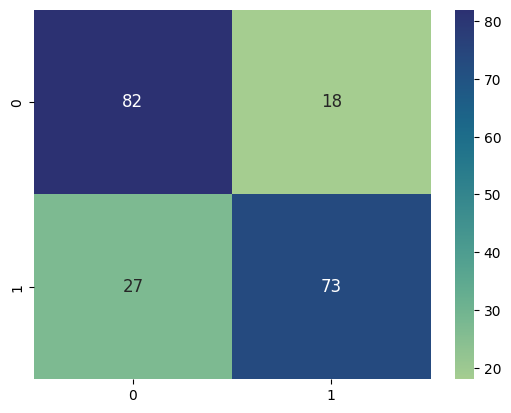

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [ ]:
print(classification_report(y_test_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.80      0.73      0.76       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



### 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=19 ,criterion='gini',max_depth=50)
RFModel.fit(x_train_resampled,y_train_resampled)
print('DTModel Train Score is : ',RFModel.score(x_train_resampled,y_train_resampled)*100)
print('DTModel Test Score is : ',RFModel.score(x_test_resampled,y_test_resampled)*100)

DTModel Train Score is :  100.0
DTModel Test Score is :  80.0


In [ ]:
y_pred=RFModel.predict(x_test_resampled)

In [ ]:
print('actual Output  : ',(y_test_resampled[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 0, 1, 0]
predict output :  [0, 0, 0, 1, 1]


In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test_resampled,y_pred)
cm

array([[88, 12],
       [28, 72]], dtype=int64)

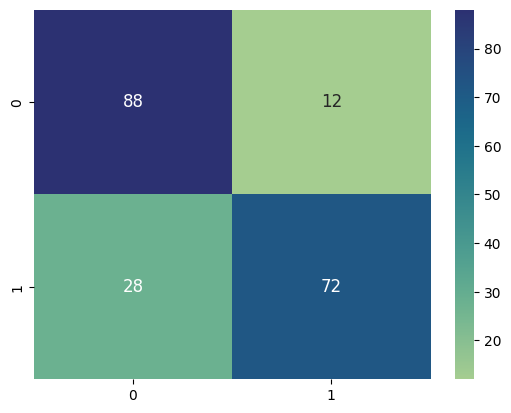

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

In [ ]:
print(classification_report(y_test_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.86      0.72      0.78       100

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



# ? we need to modify from here to the end of the code!!!

### 5. Linear regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
x_train_imputed = pd.DataFrame(x_train_resampled).fillna(pd.DataFrame(x_train_resampled).mean()).values 
y_train_imputed = pd.DataFrame(y_train_resampled).fillna(pd.DataFrame(y_train_resampled).mean()).values

regressor = KNeighborsRegressor()
regressor.fit(x_train_imputed, y_train_imputed)
print('Regressor Train Score:', regressor.score(x_train_imputed, y_train_imputed)*100)

x_test_imputed = pd.DataFrame(x_test_resampled).fillna(pd.DataFrame(x_test_resampled).mean()).values
y_test_imputed = pd.DataFrame(y_test_resampled).fillna(pd.DataFrame(y_test_resampled).mean()).values
print('Regressor Test Score:', regressor.score(x_test_imputed, y_test_imputed))



Regressor Train Score: 54.67999999999999
Regressor Test Score: 0.22719999999999996


### 6. Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

print('Accuracy of Train : ',classifier.score(X_train, y_train))
print('Accuracy of Test : ',classifier.score(X_test, y_test))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(x, test_size = 0.25, random_state = 0)


Accuracy of Train :  0.7801302931596091
Accuracy of Test :  0.7792207792207793
[[89 11]
 [23 31]]


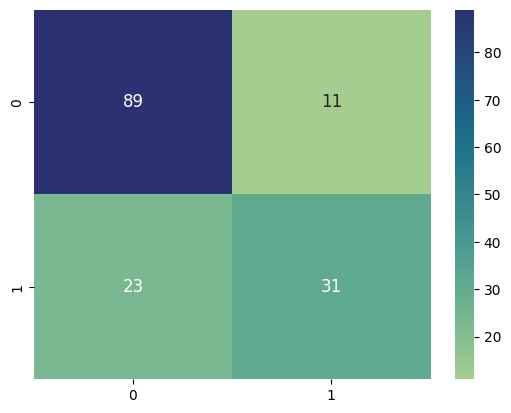

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

### 7.SVM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd

# Assuming x_train_resampled, y_train_resampled, x_test_resampled, and y_test_resampled are defined elsewhere

# Ensure x_train_resampled is a NumPy array
if not isinstance(x_train_resampled, pd.DataFrame):
    x_train_resampled = pd.DataFrame(x_train_resampled)

# Encode the first column of x_train_resampled
x_train_resampled.iloc[:, 0] = LabelEncoder().fit_transform(x_train_resampled.iloc[:, 0])

# RBF Kernel
classifier = SVC(kernel='rbf', random_state=0, C=0.001)
classifier.fit(x_train_resampled, y_train_resampled)
acc_train = classifier.score(x_train_resampled, y_train_resampled)
print(f"RBF Kernel Train Accuracy: {acc_train}")

y_pred = classifier.predict(x_test_resampled)
acc_test = accuracy_score(y_test_resampled, y_pred)
print(f"RBF Kernel Test Accuracy: {acc_test}")

# Poly Kernel
classifier = SVC(kernel='poly', degree=3, random_state=0, C=0.01)
classifier.fit(x_train_resampled, y_train_resampled)
acc_train = classifier.score(x_train_resampled, y_train_resampled)
print(f"Poly Kernel Train Accuracy: {acc_train}")

y_pred = classifier.predict(x_test_resampled)
acc_test = accuracy_score(y_test_resampled, y_pred)
print(f"Poly Kernel Test Accuracy: {acc_test}")

# Sigmoid Kernel
classifier = SVC(kernel='sigmoid', gamma=0.2, random_state=0, C=500)
classifier.fit(x_train_resampled, y_train_resampled)
acc_train = classifier.score(x_train_resampled, y_train_resampled)
print(f"Sigmoid Kernel Train Accuracy: {acc_train}")

y_pred = classifier.predict(x_test_resampled)
acc_test = accuracy_score(y_test_resampled, y_pred)
print(f"Sigmoid Kernel Test Accuracy: {acc_test}")

RBF Kernel Train Accuracy: 0.67625
RBF Kernel Test Accuracy: 0.725
Poly Kernel Train Accuracy: 0.6625
Poly Kernel Test Accuracy: 0.72
Sigmoid Kernel Train Accuracy: 0.5
Sigmoid Kernel Test Accuracy: 0.5


### 8. K-means, **The Bonus Part**